In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import norm

### Consigna 1


Tenemos que probar que 
$$
(I - A)^{-1} = I + A + A^2 + A^3 + \dots + A^n + \dots => \lim_{n \to \infty} A^{n+1} = 0
$$

Empecemos viendo la siguiente igualdad:

$$
(I - A)^{-1} = I + A + A^2 + A^3 + \dots
$$

Aca, la suma infinita es una serie geométrica aplicada a matrices. La inversa de $I - A$ se está descomponiendo en la suma de las potencias de $A$, similar a lo que sucede en la serie geométrica para números reales:
$$
\frac{1}{1 - x} = 1 + x + x^2 + x^3 + \dots
$$
donde $ |x| < 1 $.

Para demostrar lo que nos piden, comenzamos con la expresión finita de la serie, truncada en el término $n$, es decir:

$$
S_n = I + A + A^2 + A^3 + \dots + A^n
$$

Multiplicamos ambos lados por $I - A$:

$$
(I - A)S_n = (I - A)(I + A + A^2 + A^3 + \dots + A^n)
$$

El lado derecho se simplifica utilizando las propiedades distributivas y cancelando términos sucesivos:

$$
(I - A)(I + A + A^2 + \dots + A^n) = I - A^{n+1}
$$

De este modo, obtenemos la relación:

$$
(I - A)S_n = I - A^{n+1}
$$

Sabemos que $ (I - A)^{-1}$ es la suma **infinita** de las potencias de $A$, por lo que cuando $n \to \infty$, la serie truncada $S_n$ tiende a la inversa de $I - A$:

$$
S_n \to (I - A)^{-1} \quad \text{cuando} \quad n \to \infty
$$

Por lo tanto, tomando el límite cuando $n \to \infty$ en la ecuación: 
$$(I - A)S_n = I - A^{n+1}$$
obtenemos:

$$
(I - A)(I - A)^{-1} = \lim_{n \to \infty} I - A^{n+1}
$$

aplicando las propiedades basicas de limite y dado que $ (I - A)(I - A)^{-1} = I $, obtenemos:

$$
I =  I - \lim_{n \to \infty} A^{n+1}
$$

Por lo que se deduce:

$$
\lim_{n \to \infty} A^{n+1} = 0
$$

### Consigna 2

Nos piden graficar para las dos matrices $\mathbf{A_1}$ y $\mathbf{A_2}$, dos vectores definidos de la forma: $a_1(n) = \| \mathbf{A_1^n} \|_2 $ y $a_2(n) = \| \mathbf{A_2^n} \|_2 $ donde las matrices son:
$$
\mathbf{A_1} =
\begin{pmatrix}
0.186 & 0.521 & 0.014 & 0.32  & 0.134 \\
0.24  & 0.073 & 0.219 & 0.013 & 0.327 \\
0.098 & 0.12  & 0.311 & 0.302 & 0.208 \\
0.173 & 0.03  & 0.133 & 0.14  & 0.074 \\
0.303 & 0.256 & 0.323 & 0.225 & 0.257
\end{pmatrix}
\quad
\mathbf{A_2} =
\begin{pmatrix}
0.186 & 0.521 & 0.014 & 0.32  & 0.134 \\
0.24  & 0.073 & 0.219 & 0.013 & 0.327 \\
0.098 & 0.12  & 0.311 & 0.302 & 0.208 \\
0.173 & 0.03  & 0.133 & 0.14  & 0.074 \\
0.003 & 0.256 & 0.323 & 0.225 & 0.257
\end{pmatrix}
$$


In [19]:
# Primero definimos las matrices del enunciado con numpy

A1 = np.array([[0.186, 0.521, 0.014, 0.32, 0.134],
               [0.24, 0.073, 0.219, 0.013, 0.327],
               [0.098, 0.12, 0.311, 0.302, 0.208],
               [0.173, 0.03, 0.133, 0.14, 0.074],
               [0.303, 0.256, 0.323, 0.225, 0.257]])

A2 = np.array([[0.186, 0.521, 0.014, 0.32, 0.134],
               [0.24, 0.073, 0.219, 0.013, 0.327],
               [0.098, 0.12, 0.311, 0.302, 0.208],
               [0.173, 0.03, 0.133, 0.14, 0.074],
               [0.003, 0.256, 0.323, 0.225, 0.257]])


In [20]:
# Ahora vamos a crear los vectors correspondientes
N = 250
a1 = np.zeros(N)
a2 = np.zeros(N)

A1_power = np.eye(A1.shape[0])  # Id del tam de A1
A2_power = np.eye(A2.shape[0])  # Id del tam de A2

for n in range(N):
    A1_power = A1_power @ A1  # Potencia de A1
    A2_power = A2_power @ A2  # Potencia de A2
    a1[n] = norm(A1_power, 2)  # Norma 2 de A1^n
    a2[n] = norm(A2_power, 2)  # Norma 2 de A2^n


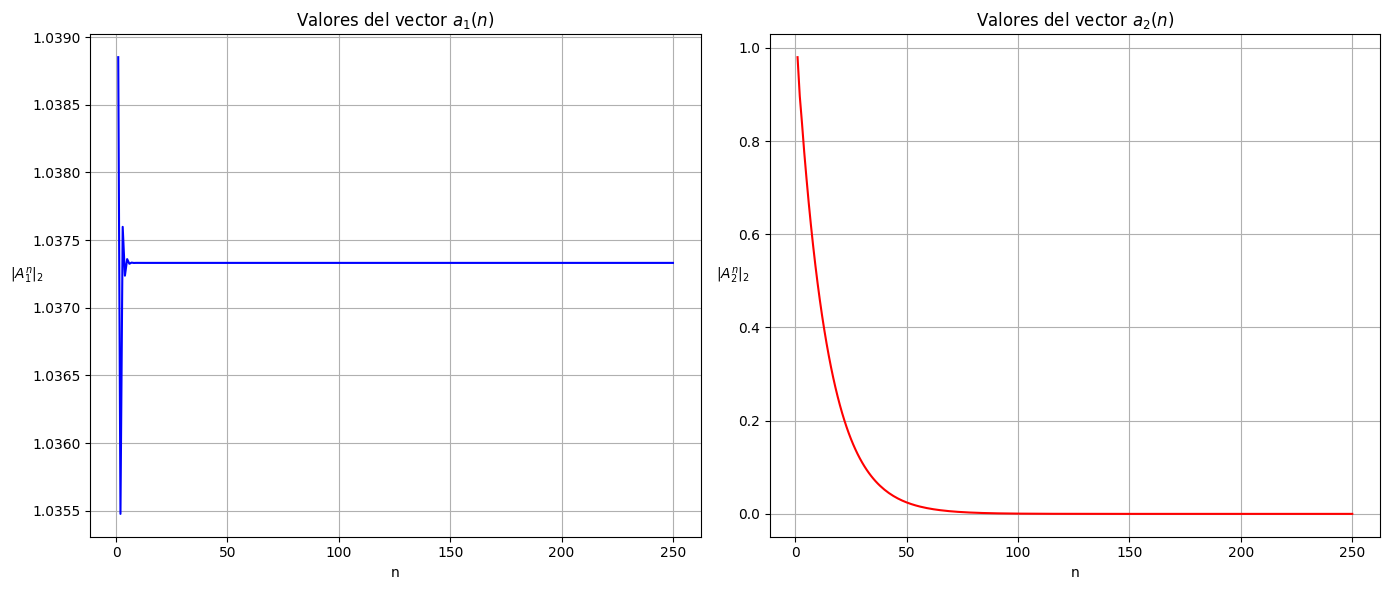

In [22]:
# Graficamos los resultados en dos figuras lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

#a1(n)
ax1.plot(range(1, N+1), a1, color='blue')
ax1.set_title('Valores del vector $a_1(n)$')
ax1.set_xlabel('n')
ax1.set_ylabel('$\|A_1^n\|_2$', rotation=0)
ax1.grid(True)

#a2(n)
ax2.plot(range(1, N+1), a2, color='red')
ax2.set_title('Valores del vector $a_2(n)$')
ax2.set_xlabel('n')
ax2.set_ylabel('$\|A_2^n\|_2$', rotation=0)
ax2.grid(True)

plt.tight_layout()
plt.show()